In [1]:
##import libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#upload the dataset 
df = pd.read_csv("auto-mpg.csv")

In [3]:
#check  contains in the dataset 
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
#description of the dataset 
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [5]:
#total value_counts in the dataset and their dtype 
df.value_counts

<bound method DataFrame.value_counts of       mpg  cylinders  displacement horsepower  weight  acceleration  \
0    18.0          8         307.0        130    3504          12.0   
1    15.0          8         350.0        165    3693          11.5   
2    18.0          8         318.0        150    3436          11.0   
3    16.0          8         304.0        150    3433          12.0   
4    17.0          8         302.0        140    3449          10.5   
..    ...        ...           ...        ...     ...           ...   
393  27.0          4         140.0         86    2790          15.6   
394  44.0          4          97.0         52    2130          24.6   
395  32.0          4         135.0         84    2295          11.6   
396  28.0          4         120.0         79    2625          18.6   
397  31.0          4         119.0         82    2720          19.4   

     model year  origin                   car name  
0            70       1  chevrolet chevelle malibu  
1

In [6]:
#first lets have some information about the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [7]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [8]:
print("Skewness: %f" %df['mpg'].skew())
print("Kurtosis: %f" %df['mpg'].kurt())

Skewness: 0.457066
Kurtosis: -0.510781


In [9]:
#we have check the skewnwss and kurtosis

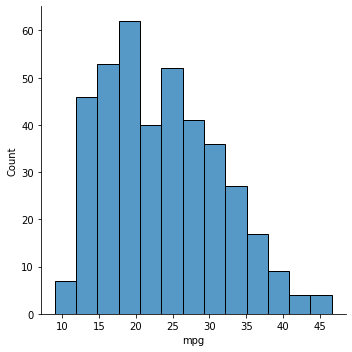

In [10]:
#lets plot simple univariate plot which helps us to understand the characteristics of 
#each section in table. 
automobile_plot = sns.displot(df['mpg'])
#or

C:\Users\uarvi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


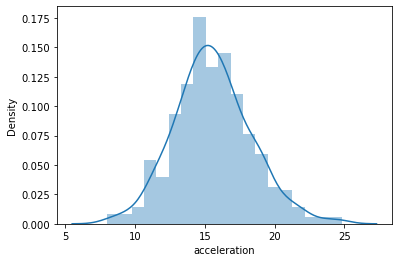

In [11]:
#or you can type 
automobile_df = sns.distplot(df['acceleration'])

In [12]:
#Now lets understand the Bivariate analysis 
#two variables 

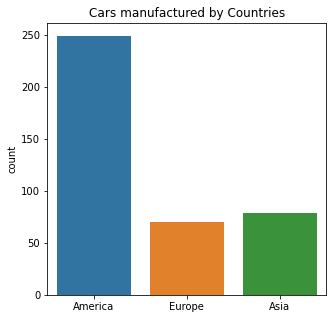

In [13]:
fig, ax = plt.subplots(figsize = (5, 5))
sns.countplot(x = df.origin.values, data=df)
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = 'America'
labels[1] = 'Europe'
labels[2] = 'Asia'
ax.set_xticklabels(labels)
ax.set_title("Cars manufactured by Countries")
plt.show()

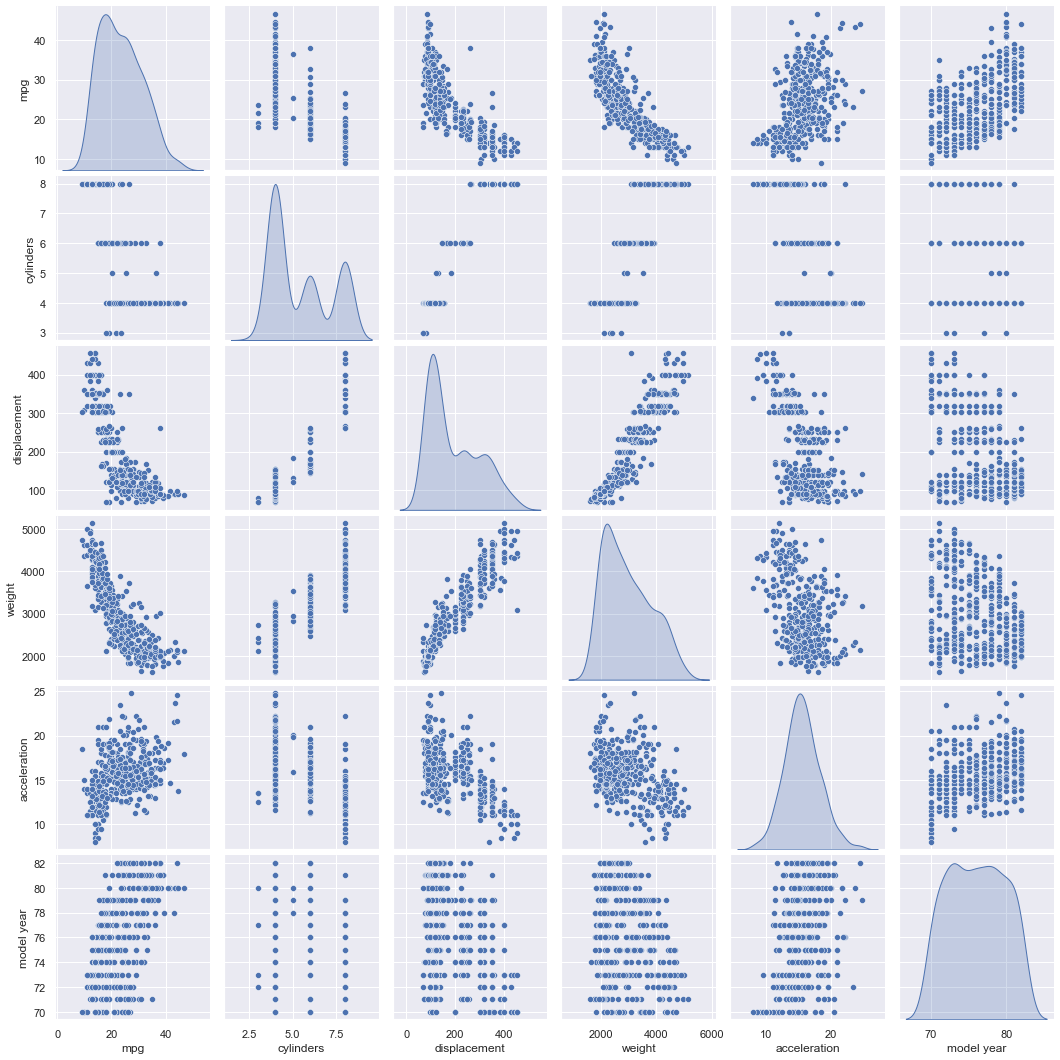

In [14]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
data = df.iloc[:, 0:7]
sns.pairplot(data, diag_kind='kde')   


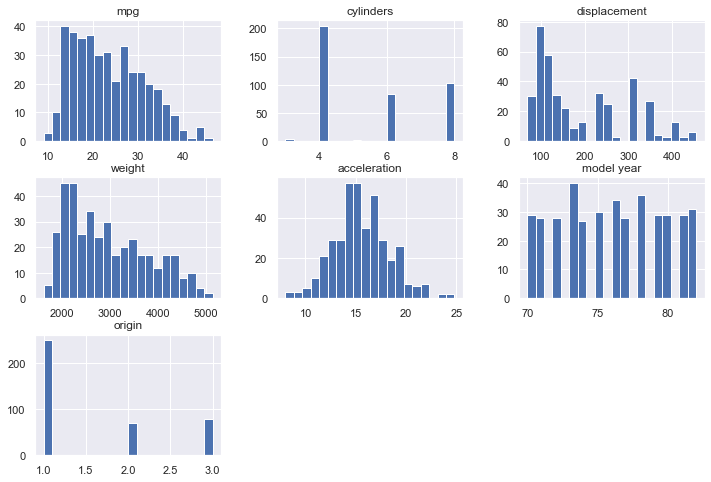

In [15]:
#now we can understand the distribution and correlation of the data 
#we can understand distribution using the histograms 
df.hist(figsize=(12,8),bins=20)
plt.show()

In [16]:
#lets understand the correlation by heatmap

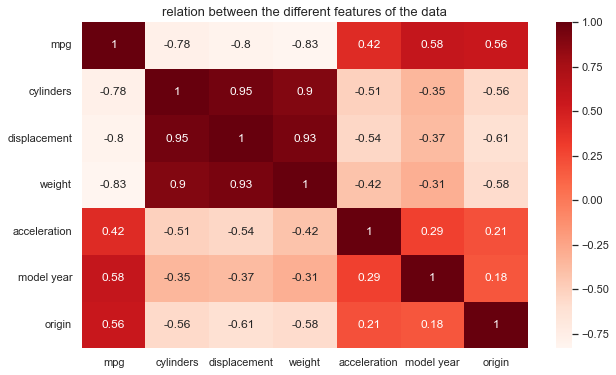

In [17]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('relation between the different features of the data',
         fontsize=13)
plt.show()

In [18]:
#now we are going to perform clustering for the above dataset 

In [21]:
import sklearn.cluster as cluster 

In [32]:
kmeans = cluster.KMeans(n_clusters=5 ,init="k-means++")
kmeans = kmeans.fit(df[['acceleration','displacement']])

In [33]:
kmeans.cluster_centers_

array([[ 16.71363636,  95.02651515],
       [ 13.35479452, 327.19178082],
       [ 16.74794521, 233.26027397],
       [ 10.972     , 413.68      ],
       [ 15.98      , 138.78947368]])

In [34]:
df['Clusters'] = kmeans.labels_

In [35]:
df['Clusters'].value_counts()

0    132
4     95
1     73
2     73
3     25
Name: Clusters, dtype: int64

In [36]:
df.to_csv('mallClusters.csv', index = False)

In [ ]:
#we can plot different clusters using scatter plot 

<AxesSubplot:xlabel='acceleration', ylabel='displacement'>

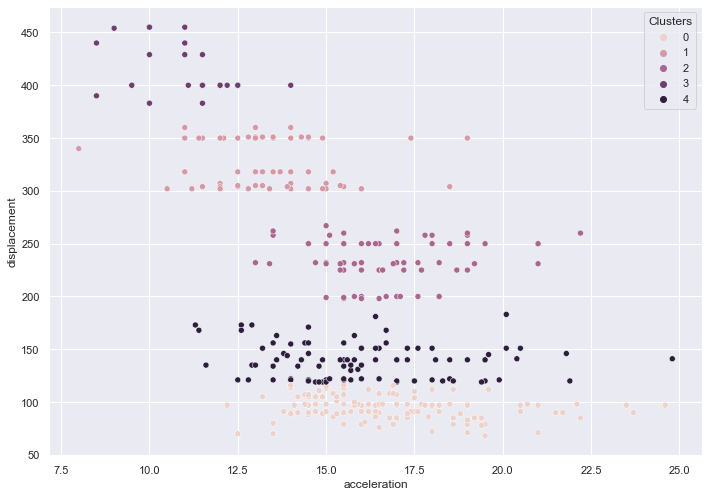

In [42]:
sns.scatterplot(x="acceleration", y="displacement",hue = 'Clusters',  data=df)

In [45]:
#we can get clusters with their centers and we can also notice the outliers in the plot. 

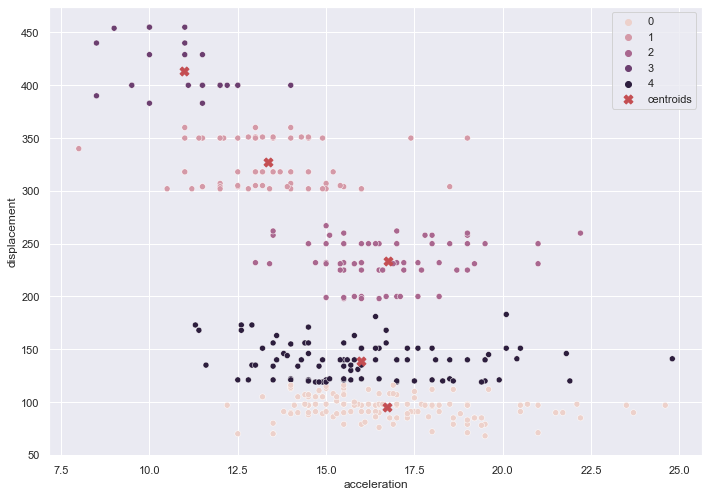

In [46]:
sns.scatterplot(data=df, x="acceleration", y="displacement", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()